<a href="https://colab.research.google.com/github/abdelhedydev/covid-tunisia/blob/master/reg_active_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd

In [82]:
data_confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data_recovered_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
data_death_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [83]:
deaths_df = pd.read_csv(data_death_url)
confirmed_df = pd.read_csv(data_confirmed_url)
recovered_df = pd.read_csv(data_recovered_url)


In [84]:
deaths_tunisia = deaths_df.loc[deaths_df['Country/Region']=='Tunisia',deaths_df.columns[4:]]
recovered_tunisia = recovered_df.loc[recovered_df['Country/Region']=='Tunisia',recovered_df.columns[4:]]
confirmed_tunisia = confirmed_df.loc[confirmed_df['Country/Region']=='Tunisia',confirmed_df.columns[4:]]

In [85]:
death_recovred_tunisia = deaths_tunisia + recovered_tunisia
active_tunisia = confirmed_tunisia - death_recovred_tunisia
active_tunisia

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,188,185,176,178,171,136,116,98,86,86,84,74,74,82,77,78,69,72,73,73,70,69,61,56,56,56,55,49,49,50,49,62,74,74,76,82,89,87,89,86


In [86]:
dates = active_tunisia.columns
dates.shape

(154,)

In [87]:
import numpy as np

In [88]:
numeros_dates = np.arange(0,len(dates),1)
active_nb = active_tunisia.to_numpy().reshape(-1)

In [89]:
df_tunisia = pd.DataFrame({'num_date':numeros_dates,
                           'nombre':active_nb},
                           index= dates)

In [90]:
X = df_tunisia['num_date']
X

1/22/20      0
1/23/20      1
1/24/20      2
1/25/20      3
1/26/20      4
          ... 
6/19/20    149
6/20/20    150
6/21/20    151
6/22/20    152
6/23/20    153
Name: num_date, Length: 154, dtype: int64

In [91]:
y = df_tunisia.nombre
y

1/22/20     0
1/23/20     0
1/24/20     0
1/25/20     0
1/26/20     0
           ..
6/19/20    82
6/20/20    89
6/21/20    87
6/22/20    89
6/23/20    86
Name: nombre, Length: 154, dtype: int64

Text(0, 0.5, 'Cas actives')

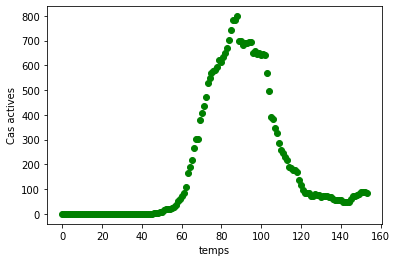

In [92]:
import matplotlib.pyplot as plt
plt.plot(X,y,'go')
plt.xlabel('temps')
plt.ylabel('Cas actives')

In [93]:
bins = [0,70,550,800]
y_binned = np.digitize(y,bins)

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=42,
                                                 test_size=0.3,
                                                 stratify=y_binned)

In [95]:
from scipy.stats import norm
def func_model(x,a,b,c):
  mu = b
  sig = a
  return c/(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

In [96]:
from scipy.optimize import curve_fit
params = curve_fit(func_model,X_train,y_train,p0=[90,44,700])

print('params',params)
a= params[0][0]
print(a)
b = params[0][1]
print(b)
c = params[0][2]

params (array([1.56887703e+01, 8.90899238e+01, 2.96081074e+04]), array([[6.95013544e-02, 5.51210440e-03, 6.82117349e+01],
       [5.51210440e-03, 7.69570251e-02, 1.07465586e+00],
       [6.82117349e+01, 1.07465586e+00, 1.97098179e+05]]))
15.688770287581358
89.08992378112268


In [97]:
y_test_lin_pres = func_model(X_test,a,b,c)
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
mean_squared_error(y_test,y_test_lin_pres)

1504.7939500543769

In [99]:
r2_score(y_test,y_test_lin_pres)

0.9762254880021555

76.5
44.45503346079047


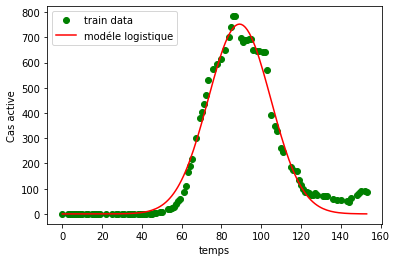

In [100]:
y_lin_pred = func_model(X,a,b,c)
plt.plot(X_train,y_train,'go',label='train data')
plt.plot(X,y_lin_pred,'r-',label='modéle logistique')
plt.xlabel('temps')
plt.ylabel('Cas active')
plt.legend()
print(np.mean(X))
print(np.std(X))